<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Hi Vladimir,

I have checked (just a part of it) you work and left comments in such cells. Cells are of two types:

<div class="alert alert-block alert-danger">
<p> <strong> A red colored cell </strong> indicates that you need to improve or adjust part of the project above. </p>
</div>
<div class="alert alert-block alert-info">
<p> <strong> A blue colored cell </strong> indicates that no improvements are needed in the cells above. May include some suggestions and recommendations.</p>
</div>

Hope it all will be clear to you :)

There is a error in cell 36 and that is why I was not able to check following parts. Please fix this problem.

------------

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

Thank you for fixing the problem :)

Unfortunately, now there is a problem in cell 38: there is no such variable called `pos`. Please fix it :)

------------

sorry, was inattentive ;)

<div class="alert alert-block alert-info">
<h2> Comments 2 </h2>
</div>

Hi :)

Thank you for fixing all the problems :) Comments on this version are in such cells.

Project is accepted - good jod:)

I would suggest that you comment more on what you do and what results you get in further projects.

*Good luck!*

------------

# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the downtown area, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
import numpy as np
import math
from sklearn.preprocessing import FunctionTransformer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Business model - we have data collected by 2 methods. Our target feature is a price, as real estate agency
we want understand what kind of factors could impact on our price, 
and what features have positive impact and what features have negative impact.
Also we want to have some model that could detect anomalies, - missing data from user input, or fraudulent activity
It means that potentially we have skewness in data, missing data and outliers.

In [2]:
filename='https://code.s3.yandex.net/datasets/real_estate_data_eng.csv'

In [3]:
filename_ru='https://code.s3.yandex.net/datasets/real_estate_data.csv'

In [4]:
estate_ru_df = pd.read_csv(filename_ru, sep = '\t')

In [5]:
estate_df = pd.read_csv(filename, sep = '\t')
estate_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Saint Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,Shushary village,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Saint Peterburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Saint Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Saint Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
estate_df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15433,19,3700000.0,34.0,2018-10-31T00:00:00,1,2.6,5.0,17.70,5,NaN,...,7.8,1.0,Saint Peterburg,27725.0,11702.0,2.0,216.0,0.0,NaN,7.0
8601,0,4400000.0,60.2,2018-12-27T00:00:00,4,2.5,5.0,47.00,4,NaN,...,5.0,1.0,Lomonosov,47993.0,51418.0,0.0,NaN,0.0,NaN,21.0
2538,4,4380000.0,47.0,2017-10-26T00:00:00,2,NaN,20.0,19.00,15,NaN,...,16.0,NaN,Pargolovo village,53115.0,19292.0,0.0,NaN,1.0,593.0,33.0
17938,20,11768000.0,60.0,2018-08-08T00:00:00,2,2.8,5.0,32.80,2,NaN,...,20.0,NaN,Saint Peterburg,24372.0,1530.0,1.0,706.0,3.0,112.0,83.0
17674,5,9735000.0,64.9,2017-02-04T00:00:00,2,2.7,20.0,35.48,6,NaN,...,12.3,NaN,Saint Peterburg,39140.0,10364.0,2.0,173.0,3.0,196.0,725.0


In [7]:
estate_df.describe(include=["float"]).T

,count,mean,std,min,25%,50%,75%,max
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0
airports_nearest,18157.0,2.879367e+04,1.263088e+04,0.0,18585.00,26726.00,37273.0,84869.0
cityCenters_nearest,18180.0,1.419128e+04,8.608386e+03,181.0,9238.00,13098.50,16293.0,65968.0
parks_around3000,18181.0,6.114075e-01,8.020736e-01,0.0,0.00,0.00,1.0,3.0


In [8]:
estate_df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [9]:
estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [10]:
df_nulls=pd.concat([estate_df.dtypes, estate_df.isna().sum(), estate_df.isna().sum()/len(estate_df)], axis=1)
df_nulls.columns = ["type","count","missing_ratio"]
df_nulls=df_nulls[df_nulls["count"]>0]
df_nulls.sort_values(by="missing_ratio", ascending=False)

,type,count,missing_ratio
is_apartment,object,20924,0.882906
parks_nearest,float64,15620,0.659100
ponds_nearest,float64,14589,0.615596
balcony,float64,11519,0.486054
ceiling_height,float64,9195,0.387991
airports_nearest,float64,5542,0.233850
cityCenters_nearest,float64,5519,0.232879
parks_around3000,float64,5518,0.232837
ponds_around3000,float64,5518,0.232837
days_exposition,float64,3181,0.134225


In [11]:
estate_df.isnull().sum().sum()

101441

In [12]:
df_nulls.shape

(14, 3)

In [13]:
estate_df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


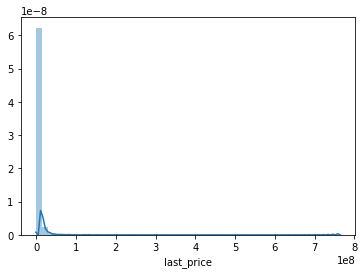

In [14]:
sns.distplot(estate_df['last_price'])

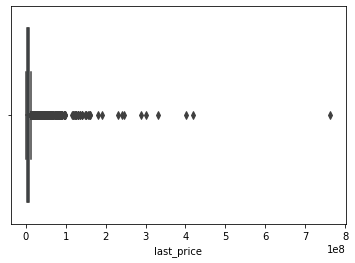

In [15]:
sns.boxplot(estate_df['last_price'])

as we see we have outliers (or our scale should be non linear, e.g. loglinear)

In [16]:
estate_df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

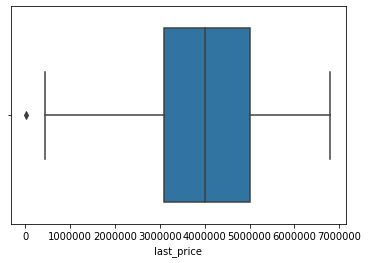

In [17]:
sns.boxplot(estate_df[estate_df['last_price']<6.800000e+06]['last_price'])

In [18]:
f"Skewness: {estate_df['last_price'].skew()}"
f"Kurtosis: {estate_df['last_price'].kurt()}"

'Skewness: 25.804275189754364'

'Kurtosis: 1277.6825842313242'

Q.E.D. last price data is skewed

In [19]:
def describe_full(df, target_name):
    data_describe = df.describe().T
    df_numeric=df._get_numeric_data()
    dtype_df=df_numeric.dtypes
    data_describe['dtypes']=dtype_df
    data_null = df_numeric.isnull().sum()/len(df) * 100
    data_describe['Missing %']=data_null
    Cardinality=df_numeric.apply(pd.Series.nunique)
    data_describe['Cardinality']=Cardinality
    df_skew=df_numeric.skew(axis = 0, skipna = True) 
    data_describe['Skew']=df_skew
    return data_describe
describe_full(estate_df, "last_price")

,count,mean,std,min,25%,50%,75%,max,dtypes,Missing %,Cardinality,Skew
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0,int64,0.000000,38,0.258593
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0,float64,0.000000,2978,25.804275
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0,float64,0.000000,2182,4.768597
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0,int64,0.000000,17,1.524982
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0,float64,38.799105,183,41.709077
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0,float64,0.362885,36,0.940275
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7,float64,8.029875,1782,3.909430
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0,int64,0.000000,33,1.553141
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0,float64,9.612220,971,4.209632
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0,float64,48.605426,6,1.243099


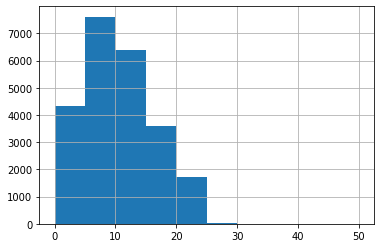

In [20]:
estate_df["total_images"].hist()

In [21]:
cols = ["total_images",
"total_area",
"rooms",
"ceiling_height",
"floors_total",
"living_area",
"floor",
"kitchen_area",
"balcony",
"airports_nearest",
"cityCenters_nearest",
"parks_around3000",
"parks_nearest",
"ponds_around3000",
"ponds_nearest",
"days_exposition"]
for col in cols:
    estate_df[[col, "last_price"]].corr()

,total_images,last_price
total_images,1.000000,0.104473
last_price,0.104473,1.000000


,total_area,last_price
total_area,1.000000,0.653675
last_price,0.653675,1.000000


,rooms,last_price
rooms,1.000000,0.363343
last_price,0.363343,1.000000


,ceiling_height,last_price
ceiling_height,1.00000,0.08543
last_price,0.08543,1.00000


,floors_total,last_price
floors_total,1.000000,-0.006984
last_price,-0.006984,1.000000


,living_area,last_price
living_area,1.000000,0.566492
last_price,0.566492,1.000000


,floor,last_price
floor,1.000000,0.026576
last_price,0.026576,1.000000


,kitchen_area,last_price
kitchen_area,1.000000,0.519869
last_price,0.519869,1.000000


,balcony,last_price
balcony,1.000000,0.029646
last_price,0.029646,1.000000


,airports_nearest,last_price
airports_nearest,1.000000,-0.026239
last_price,-0.026239,1.000000


,cityCenters_nearest,last_price
cityCenters_nearest,1.000000,-0.206747
last_price,-0.206747,1.000000


,parks_around3000,last_price
parks_around3000,1.000000,0.151058
last_price,0.151058,1.000000


,parks_nearest,last_price
parks_nearest,1.000000,-0.016414
last_price,-0.016414,1.000000


,ponds_around3000,last_price
ponds_around3000,1.000000,0.159996
last_price,0.159996,1.000000


,ponds_nearest,last_price
ponds_nearest,1.000000,-0.084809
last_price,-0.084809,1.000000


,days_exposition,last_price
days_exposition,1.000000,0.081146
last_price,0.081146,1.000000


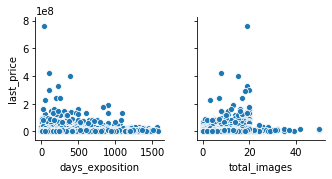

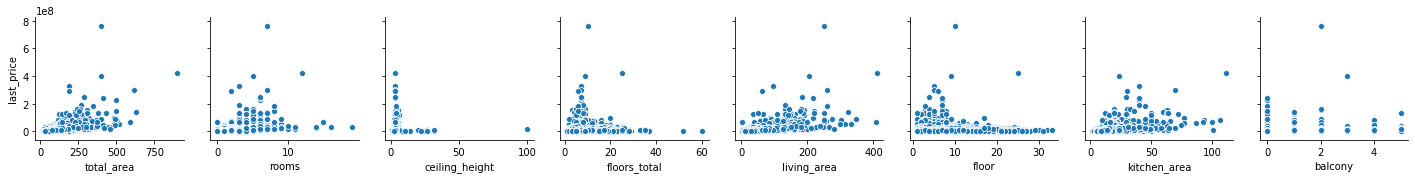

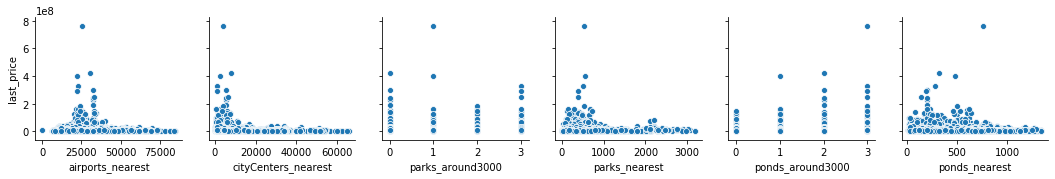

In [22]:
sns.pairplot(data=estate_df,
                  y_vars=['last_price'],
                  x_vars=["days_exposition" , "total_images"])
sns.pairplot(data=estate_df,
                  y_vars=['last_price'],
                  x_vars=["total_area","rooms","ceiling_height","floors_total","living_area","floor","kitchen_area","balcony"])
sns.pairplot(data=estate_df,
                  y_vars=['last_price'],
                  x_vars=["airports_nearest","cityCenters_nearest","parks_around3000","parks_nearest","ponds_around3000","ponds_nearest"])


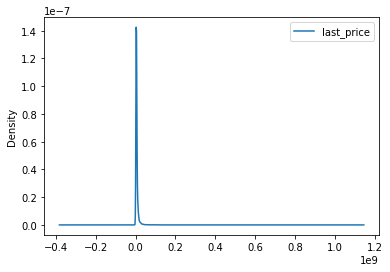

In [23]:
estate_df[['last_price']].plot(kind = 'kde')

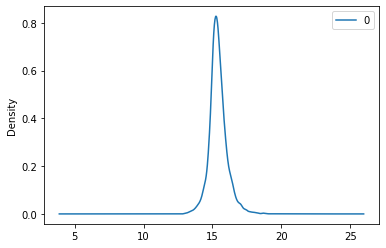

In [24]:
transformer = FunctionTransformer(np.log1p, validate=True)
pd.DataFrame(transformer.transform(estate_df[['last_price']])).plot(kind = 'kde')

In [25]:
estate_df['llast_price'] = transformer.transform(estate_df[['last_price']])

In [26]:
def display_group_density_plot(df, groupby, on, palette, figsize):
    """
    Displays a density plot by group, given a continuous variable, and a group to split the data by
    :param df: DataFrame to display data from
    :param groupby: Column name by which plots would be grouped (Categorical, maximum 10 categories)
    :param on: Column name of the different density plots
    :param palette: Color palette to use for drawing
    :param figsize: Figure size
    :return: matplotlib.axes._subplots.AxesSubplot object
    """

    if not isinstance(df, pd.core.frame.DataFrame):
        raise ValueError('df must be a pandas DataFrame')

    if not groupby:
        raise ValueError('groupby parameter must be provided')

    elif not groupby in df.keys():
        raise ValueError(groupby + ' column does not exist in the given DataFrame')

    if not on:
        raise ValueError('on parameter must be provided')

    elif not on in df.keys():
        raise ValueError(on + ' column does not exist in the given DataFrame')

    if len(set(df[groupby])) > 10:
        groups = df[groupby].value_counts().index[:10]

    else:
        groups = set(df[groupby])

    # Get relevant palette
    if palette:
        palette = palette[:len(groups)]
    else:
        palette = sns.color_palette()[:len(groups)]

    # Plot
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

    for value, color in zip(groups, palette):
        sns.kdeplot(df.loc[df[groupby] == value][on], \
                    shade=True, color=color, label=value)

    ax.set_title(str("Distribution of " + on + " per " + groupby + " group"),\
                 fontsize=30)
    
    ax.set_xlabel(on, fontsize=20)
    return ax 


No handles with labels found to put in legend.


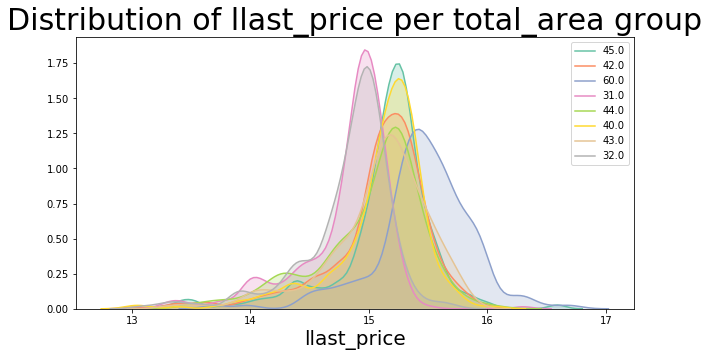

In [27]:
display_group_density_plot(estate_df, groupby = "total_area", on = 'llast_price', \
                                           palette = sns.color_palette('Set2'), 
                           figsize = (10, 5))

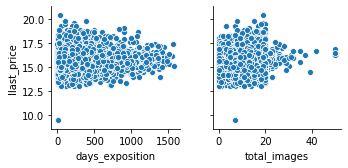

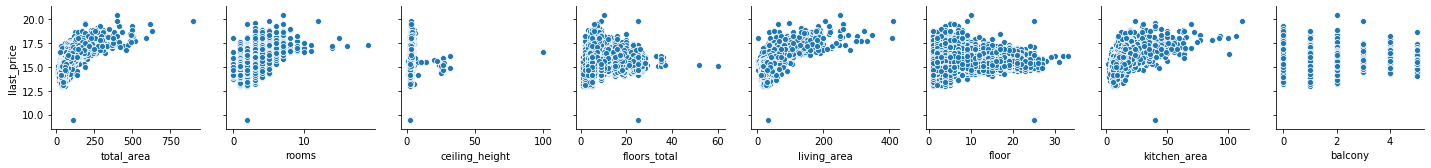

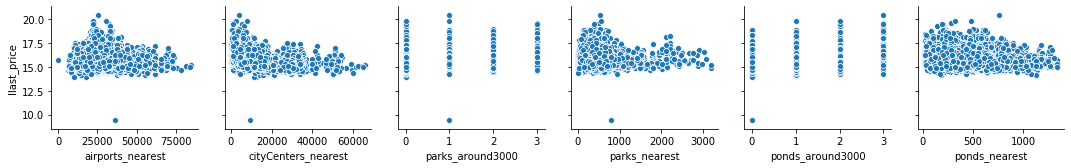

In [28]:
sns.pairplot(data=estate_df,
                  y_vars=['llast_price'],
                  x_vars=["days_exposition" , "total_images"])
sns.pairplot(data=estate_df,
                  y_vars=['llast_price'],
                  x_vars=["total_area","rooms","ceiling_height","floors_total","living_area","floor","kitchen_area","balcony"])
sns.pairplot(data=estate_df,
                  y_vars=['llast_price'],
                  x_vars=["airports_nearest","cityCenters_nearest","parks_around3000","parks_nearest","ponds_around3000","ponds_nearest"])


### Conclusion

There are a lot of missing data. Also we could see correlation between some features, but first of all we need get rid off missing data (or fill it)
It seems that is_apartment is redundant column, it has no apparrent correlation with target column (last_price)
Also target column has skewness that could bother for building good model. We need to fit columns, scale them. Because as
we saw above we have deal with imbalanced data


<ul>
    <li><em>airports_nearest</em>
        <ul>
            <li>the distance to the nearest airport in meters (m.).</li>
            <li>a lot of missing (23.4%)</li>
            <li>numerical</li>
        </ul>
    </li>
    <li><em>balcony</em>
        <ul>
            <li>the number of balconies.</li>
            <li>a lot of missing</li>
            <li>numerical</li>
        </ul>
    </li>
    <li><em>ceiling_height</em>
        <ul>
            <li>the ceiling height in meters (m.).</li>
            <li>38.8% missing</li>
            <li>numerical</li>
        </ul>
    </li>
    <li><em>cityCenters_nearest</em>
        <ul>
            <li>the distance to the Saint-Petersburg center in meters (m.).</li>
            <li>23.3% missing</li>
            <li>numerical</li>
        </ul>
    </li>
    <li><em>days_exposition</em>
        <ul>
            <li>how many days the ad was displayed (from publication to removal).</li>
            <li>13.4% missing</li>
            <li>numerical</li>
        </ul>
    </li>
    <li>
        <em>first_day_exposition -</em> the publication date.
        <ul>
            <li>datetime</li>
        </ul>
    </li>
    <li><em>floor</em>
        <ul>
            <li>the apartment floor number.</li>
        </ul>
    </li>
    <li><em>floors_total</em>
        <ul>
            <li>the total number of floors in the building.</li>
            <li>missing 0.4%</li>
        </ul>
    </li>
    <li><em>is_apartment</em>
        <ul>
            <li>legacy column which doesn't convey any important information (Boolean type). See the note below.</li>
            <li>Boolean</li>
            <li>88.3%!!! missing</li>
            <li>candidate for deleting</li>
        </ul>
    </li>
    <li><em>kitchen_area</em>
        <ul>
            <li>the kitchen area in square meters (sq.m.).</li>
            <li>9.6% missing</li>
            <li>numerical</li>
        </ul>
    </li>
    <li><em>last_price</em>
        <ul>
            <li>the price at the time when the ad was removed.</li>
        </ul>
    </li>
    <li><em>living_area</em>
        <ul>
            <li>the living area in square meters (sq.m.).</li>
            <li>8% missing</li>
            <li>high correlation</li>
        </ul>
    </li>
    <li><em>locality_name</em>
        <ul>
            <li>the locality name.</li>
            <li>0.2% missing</li>
            <li>categorical, ordinal</li>
        </ul>
    </li>
    <li><em>open_plan</em>
        <ul>
            <li>an open plan design (Boolean type).</li>
            <li>Boolean</li>
        </ul>
    </li>
    <li><em>parks_around3000</em>
        <ul>
            <li>the number of parks in a 3 km. radius.</li>
            <li>23.3% missing</li>
            <li>categorical</li>
            <li>have gueesing for simplicity turn this column to Boolean</li>
        </ul>
    </li>
    <li><em>parks_nearest</em>
        <ul>
            <li>the distance to the nearest park in meters (m.).</li>
            <li>65.9% missing</li>
            <li>numerical</li>
        </ul>
    </li>
    <li><em>ponds_around3000</em>
        <ul>
            <li>the number of bodies of water in a 3 km. radius.</li>
            <li>23.3% missing like in parks_around3000</li>
            <li>categorical</li>
        </ul>
    </li>
    <li><em>ponds_nearest</em>
        <ul>
            <li>the distance to the nearest body of water (m.).</li>
            <li>61.6% misisng</li>
            <li>numerical</li>
        </ul>
    </li>
    <li><em>rooms</em>
        <ul>
            <li>the number of bedrooms.</li>
        </ul>
    </li>
    <li><em>studio</em>
        <ul>
            <li>whether it's a studio or not (Boolean type).</li>
            <li>Boolean</li>
        </ul>
    </li>
    <li><em>total_area</em>
        <ul>
            <li>the total area in square meters (sq.m.).</li>
        </ul>
    </li>
    <li><em>total_images</em>
        <ul>
            <li>the number of photos of the apartment in the ad.</li>
        </ul>
    </li>
</ul>

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Okay :)

Do not forget to name graphs and their axis :)

------------

### Step 2. Data preprocessing

<ul><li>Determine and study the missing values:
  <ul><li>A practical replacement can be presumed for some missing values. For example, if the user doesn’t enter the number of balconies, then there probably aren’t any. The correct course of action here is to replace these missing values with 0. There’s no suitable replacement value for other data types. In this case, leave these values blank. A missing value is also a key indicator that mustn’t be hidden.</li><li>Fill in the missing values where appropriate. Explain why you’ve chosen to fill the missing values in these particular columns and how you selected the values.</li><li>Describe the factors that may have led up to the missing values.</li></ul></li><li>Convert the data to the required types:
  <ul><li>Indicate the columns where the data types have to be changed and explain why.</li></ul></li></ul>

#### is_apartment

Note: the column 'is_apartment' has True values for properties that belong to the Russian real estate entity confusingly called "apartments" - a space that is non-residential in a legal sense and is not considered a part of the housing stock, even though it is often used for temporary rental housing. This column has nothing to do with whether the property in question is an apartment or not - all records in this dataset are apartments.

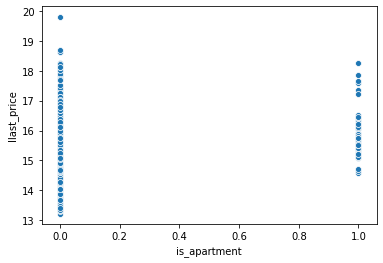

In [29]:
sns.scatterplot(x="is_apartment", y="llast_price", data=estate_df)

A lot of missing data. Maybe there is some influence on last_price in valid data of is_apartment, but it's not our case
Let's drop it

In [30]:
estate_df = estate_df.drop("is_apartment", axis=1)

In [31]:
df_nulls=pd.concat([estate_df.dtypes, estate_df.isna().sum(), estate_df.isna().sum()/len(estate_df)], axis=1)
df_nulls.columns = ["type","count","missing_ratio"]
df_nulls=df_nulls[df_nulls["count"]>0]
df_nulls.sort_values(by="missing_ratio", ascending=False)

,type,count,missing_ratio
parks_nearest,float64,15620,0.659100
ponds_nearest,float64,14589,0.615596
balcony,float64,11519,0.486054
ceiling_height,float64,9195,0.387991
airports_nearest,float64,5542,0.233850
cityCenters_nearest,float64,5519,0.232879
parks_around3000,float64,5518,0.232837
ponds_around3000,float64,5518,0.232837
days_exposition,float64,3181,0.134225
kitchen_area,float64,2278,0.096122


<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Okay :)

------------

#### locality_name

In [32]:
estate_df[estate_df["locality_name"].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,llast_price
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,False,...,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,15.967273
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,False,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,15.501539
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,15.024998
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,15.450732
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,False,...,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,15.250595
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,False,...,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,16.683410
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0,16.034714
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,False,...,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0,15.520259
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,...,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0,16.421159
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,False,...,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0,15.123844


let's infer locality from geo metric

In [33]:
df_locality_city_cntr = estate_df[~estate_df["locality_name"].isna()][["locality_name", "cityCenters_nearest"]].drop_duplicates().dropna()[:].reset_index()
df_locality_city_cntr

,index,locality_name,cityCenters_nearest
0,0,Saint Peterburg,16028.0
1,1,Shushary village,18603.0
2,2,Saint Peterburg,13933.0
3,3,Saint Peterburg,6800.0
4,4,Saint Peterburg,8098.0
...,...,...,...
7666,23665,Saint Peterburg,4946.0
7667,23668,Saint Peterburg,9167.0
7668,23678,Pushkin,27977.0
7669,23681,Saint Peterburg,7262.0


In [34]:
df_locality_city_cntr.groupby("locality_name").mean()

,index,cityCenters_nearest
locality_name,,
Aleksandrovskaya village,10575.500000,27468.000000
Beloostrov village,7948.000000,38868.000000
Kolpino,10391.965854,31966.921951
Krasnoye Selo,9052.648148,30212.750000
Kronshtadt,11207.735294,49599.573529
Levashovo village,6987.000000,25727.000000
Lisiy Nos village,13447.333333,27613.333333
Lomonosov,10454.795455,51059.840909
Metallostroy village,10687.951220,27575.121951


In [35]:
len(estate_df["locality_name"].unique())
len(estate_df["locality_name"].str.replace("village","").str.strip().unique())
set(estate_df["locality_name"].unique()) - set(estate_df["locality_name"].str.replace("village","").str.strip().unique())

342

322

{' Lesnoye village',
 '60 km village',
 'Agalatovo village',
 'Aleksandrovskaya village',
 'Annino village',
 'Aro village',
 'Baryshevo village ',
 'Batovo village',
 'Beloostrov village',
 "Bol'shaya Vruda village",
 "Bol'shiye Kolpany village",
 "Bol'shoy Sabsk village",
 'Bolshaya Izhora village',
 'Bolshoy Reyzino village',
 'Bor village',
 'Borisova Griva village',
 'Bugry village',
 'Chudskoy Bor village',
 'Druzhnaya Gorka village',
 'Druzhnoselye village',
 'Dubrovka village',
 'Dzerzhinsky village',
 'Elizavetino village',
 'Falileevo village',
 'Fort Krasnaya Gorka village',
 'Garbolovo village',
 'Gavrilovo village',
 'Gladkoye village',
 'Glazhevo village',
 'Glebychevo village',
 'Glinka village ',
 'Goncharovo village',
 'Gorbunki village',
 'Gostilitsy village',
 'Gromovo village',
 'Hapo-Oe village',
 "Il'ichevo village",
 'Issad village',
 'Izvara village',
 "Kal'tino village",
 'Kalitino village',
 'Kalozhitsy village',
 'Kamyshovka village',
 'Kaskovo village',
 'Ke

In [36]:
!pip install aiohttp

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 1.2 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 256 kB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 149 kB 6.9 MB/s eta 0:00:01


In [37]:
### GEO UTILS ###

from math import asin, sqrt, pow, sin, cos, pi
from numpy import rad2deg, deg2rad

RADIUS_METERS = 6378137

import requests
import aiohttp
import asyncio

spb_loc = (30.3609, 59.9311)

async def get_pos(locality):
    url = "https://geocode-maps.yandex.ru/1.x/?apikey=9dc2f628-77ef-4202-ad14-913e947114f4&format=json&geocode={}&ll=30.3609,59.9311&results=1".format(
        locality)
    async with aiohttp.ClientSession() as session:
        json = await fetch(session, url)
        lon, lat = None, None
        try:
            response = json["response"]["GeoObjectCollection"]["featureMember"][0]["GeoObject"]["Point"]["pos"]
            response = response.split() 
            lon, lat = float(response[0]), float(response[1])
        except:
            pass
        return lon, lat


async def fetch(session, url):
    async with session.get(url) as response:
        return await response.json()
    
def calc_dist_km(t1, t2):
    """
    :param t1: (LONGITUDE, LATITUDE)
    :param t2:  (LONGITUDE, LATITUDE)
    :return: calculate distance(meters) between points (WGS84)
    """
    if t1 is None or t2 is None:
        return 0
    lng1, lat1 = t1
    lng1, lat1 = deg2rad(lng1), deg2rad(lat1)
    lng2, lat2 = t2
    lng2, lat2 = deg2rad(lng2), deg2rad(lat2)
    return 2 * asin(
        sqrt(pow(sin((lat1 - lat2) / 2), 2) + cos(lat1) * cos(lat2) * pow(sin((lng1 - lng2) / 2), 2))) * RADIUS_METERS/1000

def dist_line_km(line):
    return sum(calc_dist_km(prev, curr) for prev, curr in prev_curr(line) if not prev is None)



In [38]:
pos_locality = {}
for locality in estate_ru_df["locality_name"].unique():
    pos = await get_pos(locality)
    pos_locality[locality] = pos

In [39]:
dist_locality = {}
for locality_name, pos in pos_locality.items():
    dist_locality[locality_name] = calc_dist_km(spb_loc, pos)

In [40]:
estate_ru_df["pos"] = estate_ru_df["locality_name"].apply(lambda l: pos_locality[l]) 

In [41]:
estate_ru_df["dist"] = estate_ru_df["locality_name"].apply(lambda l: dist_locality[l]) 

In [42]:
estate_df["pos"] = estate_ru_df["pos"]
estate_df["dist"] = estate_ru_df["dist"]*1000

In [43]:
#probably geocoding couldn't work in a good way with case when locality name is Spb itself (it's large city)
estate_df[estate_df["locality_name"]!="Saint Peterburg"][["cityCenters_nearest", "dist", "locality_name"]]

,cityCenters_nearest,dist,locality_name
1,18603.0,13829.429810,Shushary village
5,NaN,11285.044897,Yanino village
6,19143.0,17688.048726,Pargolovo village
8,NaN,14060.431453,Murino village
11,51677.0,32685.747804,Lomonosov
...,...,...,...
23692,NaN,181020.501962,Tikhvin
23693,34104.0,25784.805260,Petergof
23695,NaN,52246.917120,Tosno
23696,NaN,71463.730881,Rozhdestveno village


In [44]:
estate_df.loc[(estate_df["cityCenters_nearest"].isna()) & (estate_df["locality_name"]!="Saint Peterburg"), "cityCenters_nearest"] = estate_df["dist"]

In [45]:
estate_df[estate_df["cityCenters_nearest"].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,llast_price,pos,dist
81,9,10949000.0,68.00,2018-12-27T00:00:00,1,NaN,10.0,NaN,6,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.208759,"(30.315635, 59.938951)",2671.393565
593,20,4200000.0,38.30,2019-04-16T00:00:00,1,2.6,16.0,19.8,10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.250595,"(30.315635, 59.938951)",2671.393565
604,11,9899000.0,101.00,2018-12-12T00:00:00,3,3.0,5.0,62.0,3,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.107944,"(30.315635, 59.938951)",2671.393565
742,7,37000000.0,161.00,2016-05-22T00:00:00,3,NaN,9.0,84.0,8,False,...,NaN,NaN,NaN,NaN,NaN,NaN,402.0,17.426428,"(30.315635, 59.938951)",2671.393565
795,19,7100000.0,59.60,2019-02-13T00:00:00,2,3.4,5.0,36.6,2,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.775605,"(30.315635, 59.938951)",2671.393565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21668,9,4500000.0,34.30,2019-03-04T00:00:00,1,NaN,9.0,17.5,3,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.319588,"(30.315635, 59.938951)",2671.393565
21881,15,44500000.0,169.00,2019-02-28T00:00:00,3,3.3,9.0,101.0,7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.611000,"(30.315635, 59.938951)",2671.393565
21955,19,130000000.0,431.00,2017-10-02T00:00:00,7,3.7,8.0,220.0,5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,161.0,18.683045,"(30.315635, 59.938951)",2671.393565
22554,5,3415000.0,31.65,2019-04-16T00:00:00,1,NaN,24.0,NaN,14,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.043688,"(30.315635, 59.938951)",2671.393565


<div class="alert alert-block alert-danger">
<h2> Comments </h2>
</div>

Here is a probem 😓 Can you fix it?

------------

<div class="alert alert-block alert-danger">
<h2> Comments </h2>
</div>

Fixed it 

------------

In [46]:
estate_df["locality_name"] = estate_df["locality_name"].str.replace("village","").str.strip()

In [47]:
estate_median_locality_df = estate_df.pivot_table(index='locality_name', values=['airports_nearest', 'cityCenters_nearest'],aggfunc='median')
estate_median_locality_df

,airports_nearest,cityCenters_nearest
locality_name,,
60 km,NaN,6.484241e+04
Agalatovo,NaN,3.232860e+04
Aleksandrovskaya,12896.5,2.746800e+04
Alekseyevka,NaN,1.047210e+05
Annino,NaN,2.476619e+04
...,...,...
Zelyony Bor,NaN,1.781576e+06
Zhilgorodok,NaN,2.873532e+04
Zhilposelok,NaN,5.735833e+04


In [48]:
def fill_dist_metric(row, col):
    locality = row['locality_name']
    if locality in estate_median_locality_df.index:
        return estate_median_locality_df.loc[locality][col]
    return row[col]
for column in ['airports_nearest', 'cityCenters_nearest']:
    estate_df.loc[estate_df[column].isnull(), column] = estate_df.apply(fill_dist_metric, axis=1, args=(column,))

In [49]:
estate_df['airports_nearest'] = estate_df['airports_nearest'].fillna(-1)
estate_df['cityCenters_nearest'] = estate_df['cityCenters_nearest'].fillna(-1)

In [50]:
estate_df[estate_df['cityCenters_nearest'].isnull()]["locality_name"]

Series([], Name: locality_name, dtype: object)

<div class="alert alert-block alert-info">
<h2> Comments 2 </h2>
</div>

Great 🔥🔥🔥

------------

#### first_day_exposition

In [51]:
estate_df["first_day_exposition"].dtype

dtype('O')

In [52]:
estate_df["first_day_exposition"] = pd.to_datetime(estate_df["first_day_exposition"])
estate_df["first_day_exposition"].dtype

dtype('<M8[ns]')

In [53]:
estate_df["first_day_exposition"].sample(5)

21229   2017-06-30
4484    2017-11-07
3538    2018-02-28
1750    2018-01-18
1798    2019-01-26
Name: first_day_exposition, dtype: datetime64[ns]

#### cityCenters_nearest,parks_around3000, ponds_around3000

Those columns have approx. the same missing values but cityCenters_nearest. Let's check diff

airports_nearest
cityCenters_nearest
parks_around3000
parks_nearest
ponds_around3000
ponds_nearest

In [54]:
estate_df[(estate_df["cityCenters_nearest"].isna()) & (~estate_df["parks_around3000"].isna())].T

""
total_images
last_price
total_area
first_day_exposition
rooms
ceiling_height
floors_total
living_area
floor
studio


count      369.000000
mean     28730.986746
std       2762.481330
min      23436.109178
25%      26433.000000
50%      27920.000000
75%      30693.000000
max      35610.000000
Name: cityCenters_nearest, dtype: float64

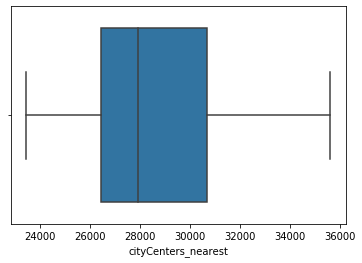

In [55]:
df_city_centers_pushkin = estate_df[(estate_df["locality_name"]=="Pushkin") | (estate_df["airports_nearest"]==15527)]["cityCenters_nearest"]
df_city_centers_pushkin.describe()
sns.boxplot(df_city_centers_pushkin)

It's pretty around. We could assign mean value in one case where cityCenters_nearest is na and parks_around3000 is vice verca

In [56]:
estate_df[(estate_df["cityCenters_nearest"].isna()) & (~estate_df["parks_around3000"].isna())]["cityCenters_nearest"]=df_city_centers_pushkin.mean()

In [57]:
estate_df[(estate_df["cityCenters_nearest"].isna()) & (estate_df["parks_around3000"].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,llast_price,pos,dist


#### balcony

Likelihood that missing value of balcony it's when users didn't write anything if balcony's value was zero

In [58]:
estate_df["balcony"].fillna(0, inplace=True)

In [59]:
estate_df["balcony"].isna().sum()

0

#### days_exposition

In [60]:
estate_df[estate_df["days_exposition"].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,llast_price,pos,dist
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,18863.0,16028.000000,1.0,482.0,2.0,755.0,NaN,16.380460,"(30.315635, 59.938951)",2671.393565
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,23982.0,11634.000000,0.0,NaN,0.0,NaN,NaN,15.884270,"(30.315635, 59.938951)",2671.393565
44,13,5350000.0,40.00,2018-11-18,1,NaN,22.0,NaN,3,False,...,30471.0,11603.000000,1.0,620.0,1.0,1152.0,NaN,15.492607,"(30.315635, 59.938951)",2671.393565
45,17,5200000.0,50.60,2018-12-02,2,2.65,9.0,30.3,7,False,...,30011.0,12872.000000,0.0,NaN,0.0,NaN,NaN,15.464169,"(30.315635, 59.938951)",2671.393565
46,17,6600000.0,52.10,2019-01-31,2,2.60,24.0,29.7,9,False,...,15114.0,12702.000000,0.0,NaN,0.0,NaN,NaN,15.702580,"(30.315635, 59.938951)",2671.393565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26.0,71.4,17,False,...,11827.0,11459.000000,0.0,NaN,0.0,NaN,NaN,16.878902,"(30.315635, 59.938951)",2671.393565
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5.0,17.3,5,False,...,48393.0,51818.000000,0.0,NaN,0.0,NaN,NaN,14.727794,"(29.776466, 59.91074)",32685.747804
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,24665.0,4232.000000,1.0,796.0,3.0,381.0,NaN,16.087637,"(30.315635, 59.938951)",2671.393565
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,-1.0,71463.730881,NaN,NaN,NaN,NaN,NaN,14.731802,"(29.948897, 59.323866)",71463.730881


In [61]:
estate_df[estate_df["days_exposition"]==0]
estate_df[estate_df["days_exposition"]==1]
estate_df[estate_df["days_exposition"]==2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,llast_price,pos,dist


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,llast_price,pos,dist
1632,19,4000000.0,49.9,2019-05-01,2,2.5,9.0,25.0,1,False,...,13567.0,14384.0,1.0,20.0,1.0,681.0,1.0,15.201805,"(30.315635, 59.938951)",2671.393565


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,llast_price,pos,dist
13061,20,6100000.0,51.4,2019-04-29,2,3.0,5.0,31.7,4,False,...,10776.0,9389.0,0.0,NaN,0.0,NaN,2.0,15.623799,"(30.315635, 59.938951)",2671.393565
16053,4,4070000.0,45.1,2019-04-30,2,NaN,5.0,22.7,3,False,...,40859.0,11668.0,2.0,485.0,0.0,NaN,2.0,15.219154,"(30.315635, 59.938951)",2671.393565
16212,0,7806000.0,25.0,2019-04-30,1,3.0,5.0,NaN,5,False,...,36525.0,10302.0,0.0,NaN,0.0,NaN,2.0,15.870403,"(30.315635, 59.938951)",2671.393565


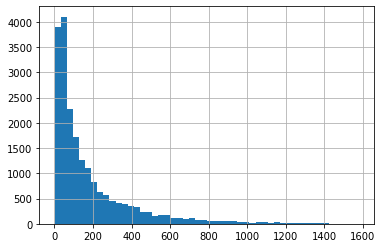

In [62]:
estate_df["days_exposition"].hist(bins=50)

In [63]:
estate_df[~estate_df["days_exposition"].isna()][["days_exposition"]].groupby("days_exposition").agg({"days_exposition":"count"}).head(10)

,days_exposition
days_exposition,
1.0,1
2.0,3
3.0,158
4.0,176
5.0,152
6.0,124
7.0,234
8.0,139
9.0,143


It seems that missed days are between 1 and 2. 

<div class="alert alert-block alert-info">
<h2> Comments 2 </h2>
</div>

Okay :)

------------

#### kitchen area

In [64]:
estate_df['kitchen_area'] = estate_df['kitchen_area'].fillna(estate_df['kitchen_area'].median())
estate_df['kitchen_area'].isna().sum()

0

<div class="alert alert-block alert-info">
<h2> Comments 2 </h2>
</div>

Filling in living and kitchen area with median area can result in sum of living and kitchen area being greater than the total area of the observation, which is not realistic at all. To make this approach more realistic you should at least fill nan values with respect to the number of rooms in the ad. Another way to deal with these nulls is to study living to total area ratio and kitchen to total area ration and fill nans based on these ratios. These ratios are quite similar for all types of ads.

------------

#### ceiling_height

In [65]:
estate_df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Assume that ceil height around 3.0m, and value 100 is incorrect

In [66]:
estate_df.loc[estate_df['ceiling_height']==estate_df['ceiling_height'].max(), 'ceiling_height'] = np.nan

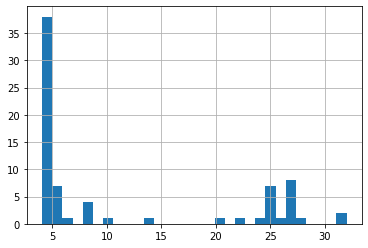

In [67]:
estate_df.loc[estate_df['ceiling_height']>4]['ceiling_height'].hist(bins=30)

In [68]:
estate_df.loc[estate_df['ceiling_height']>10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,llast_price,pos,dist
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,-1.0,42487.084071,NaN,NaN,NaN,NaN,259.0,15.096445,"(30.124473, 59.568492)",42487.084071
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,-1.0,111191.378979,NaN,NaN,NaN,NaN,NaN,14.880222,"(32.352672, 59.900538)",111191.378979
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,...,12016.0,13256.000000,1.0,658.0,1.0,331.0,181.0,15.274126,"(30.315635, 59.938951)",2671.393565
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,...,51553.0,14060.431453,NaN,NaN,NaN,NaN,28.0,14.914123,"(30.438578, 60.051284)",14060.431453
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,False,...,29686.0,8389.000000,3.0,397.0,1.0,578.0,7.0,15.163584,"(30.315635, 59.938951)",2671.393565
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,-1.0,56683.202829,NaN,NaN,NaN,NaN,540.0,14.731802,"(30.397363, 59.422239)",56683.202829
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,...,28981.0,10912.000000,1.0,305.0,0.0,NaN,267.0,15.297115,"(30.315635, 59.938951)",2671.393565
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,18732.0,20444.000000,0.0,NaN,3.0,80.0,38.0,15.913529,"(30.315635, 59.938951)",2671.393565
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,...,68923.0,50649.000000,1.0,417.0,2.0,73.0,NaN,15.009433,"(29.775846, 59.991786)",33294.347178
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,False,...,11647.0,13581.000000,0.0,NaN,0.0,NaN,NaN,15.189226,"(30.315635, 59.938951)",2671.393565


strange value, let's fill na by median, because mean is perceptive to outliers

In [69]:
estate_df['ceiling_height'] = estate_df['ceiling_height'].fillna(estate_df['ceiling_height'].median())
estate_df['ceiling_height'].isna().sum()

0

<div class="alert alert-block alert-info">
<h2> Comments 2 </h2>
</div>

Okay :)

------------

#### living_area

Let's fill it by median, but assuming that it could not be less than kithen area(according common sense)

In [70]:
living_area_median = estate_df['living_area'].median()
estate_df['living_area'] = estate_df.apply(lambda row: max(living_area_median, row['kitchen_area']) if np.isnan(row["living_area"]) else row["living_area"], axis=1)
estate_df['living_area'].isna().sum()

0

#### floors_total

Depends of building, we don't have some specific features that could point on total floors (Sure, we could not use 
for that target column). try to see distribution, calculate depends on it, mean, locality and also floors_total>=floor 

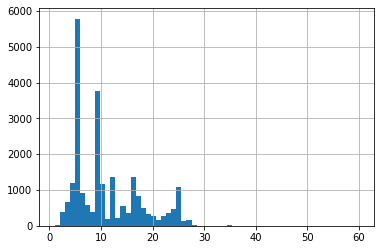

In [71]:
estate_df["floors_total"].hist(bins=60)

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

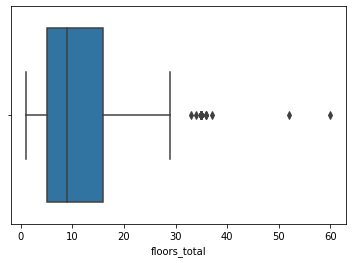

In [72]:
estate_df["floors_total"].describe()
sns.boxplot(estate_df["floors_total"])

as we see, we have strange data. (outliers) unlikely that there is 60 floors, I googled, in Saint Petersburg area max floor is 42

In [73]:
estate_df[estate_df["floors_total"]>30][["floors_total", "locality_name", "cityCenters_nearest", "airports_nearest"]]

,floors_total,locality_name,cityCenters_nearest,airports_nearest
397,36.0,Saint Peterburg,20444.0,18732.0
871,35.0,Saint Peterburg,20444.0,18732.0
1060,35.0,Saint Peterburg,20444.0,18732.0
1697,34.0,Saint Peterburg,20444.0,18732.0
1917,35.0,Saint Peterburg,20444.0,18732.0
2253,60.0,Kronshtadt,49488.0,67763.0
2966,35.0,Saint Peterburg,20444.0,18732.0
4855,35.0,Saint Peterburg,20339.0,18627.0
5749,35.0,Saint Peterburg,20444.0,18732.0
5807,36.0,Saint Peterburg,20444.0,18732.0


In [74]:
estate_df[estate_df["floors_total"]>36][["floors_total", "locality_name", "cityCenters_nearest", "airports_nearest"]]

,floors_total,locality_name,cityCenters_nearest,airports_nearest
2253,60.0,Kronshtadt,49488.0,67763.0
16731,52.0,Saint Peterburg,12978.0,20728.0
16934,37.0,Saint Peterburg,20444.0,18732.0


I checked, building with 37 floors is real (it seems that it's  Alexander Nevsky (residential complex)). 

In [75]:
estate_df[(estate_df["locality_name"]=="Kronshtadt")]["floors_total"].describe()

count    96.000000
mean      7.125000
std       6.453477
min       2.000000
25%       4.000000
50%       5.000000
75%       9.000000
max      60.000000
Name: floors_total, dtype: float64

It's seems that it's just typo. 60 instead 6

In [76]:
estate_df.loc[estate_df["floors_total"]==60, "floors_total"] = 6

In [77]:
mean_floors_estate_df = estate_df.groupby('locality_name').agg({'floors_total': 'mean', 'floor':'max'}).reset_index()
mean_floors_estate_df["floors_total"] = mean_floors_estate_df["floors_total"].astype(np.int)  
replacer_map = {row["locality_name"]:max(row["floors_total"],row["floor"]) for i, row in mean_floors_estate_df.iterrows()}
estate_df['floors_total'] = estate_df['floors_total'].fillna(estate_df["locality_name"].map(replacer_map))

In [78]:
estate_df.loc[estate_df["floors_total"].isnull(), "floors_total"] = estate_df[estate_df["floors_total"].isnull()]["floor"]

In [79]:
estate_df["floors_total"] = estate_df["floors_total"].astype(np.int)

<div class="alert alert-block alert-info">
<h2> Comments 2 </h2>
</div>

Okay :)

------------

### Step 3. Make calculations and add them to the table

<ul><li>the price per square meter</li><li>the day of the week, month, and year that the ad was published</li><li>which floor the apartment is on (first, last, or other)</li><li>the ratio between the living space and the total area, as well as between the kitchen space and the total area.</li></ul>

#### the price per square meter

In [80]:
def price_per_square_meter(row):
    total_area = row['total_area']
    return row['last_price']/total_area if total_area!=0 else 0

estate_df['price_per_square_meter'] = estate_df.apply(price_per_square_meter, axis=1)

#### the day of the week, month, and year that the ad was published

In [81]:
estate_df["weekday"] = estate_df["first_day_exposition"].dt.weekday
estate_df["month"] = estate_df["first_day_exposition"].dt.month
estate_df["year"] = estate_df["first_day_exposition"].dt.year
estate_df["day"] = estate_df["first_day_exposition"].dt.day

#### which floor the apartment is on (first, last, or other)

In [82]:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1 :
        return 'first'
    elif floor == floors_total:
        return 'last'
    return 'other'

estate_df['floor_type'] = estate_df.apply(floor_type, axis=1)

In [83]:
estate_df["first_floor"] = (estate_df["floor"] == 1).astype(np.int)

In [84]:
estate_df["last_floor"] = (estate_df["floor"] == estate_df["floors_total"]).astype(np.int)

In [85]:
estate_df["other_floor"] = (estate_df["floor"] != 1) & (estate_df["floor"] != estate_df["floors_total"]).astype(np.int)

#### the ratio between the living space and the total area, as well as between the kitchen space and the total area.

In [86]:
def living_area_ratio(row):
    total_area = row['total_area']
    return row['living_area']/total_area if total_area!=0 else 0

estate_df['living_area_ratio'] = estate_df.apply(living_area_ratio, axis=1)

In [87]:
def kitchen_area_ratio(row):
    total_area = row['total_area']
    return row['kitchen_area']/total_area if total_area!=0 else 0

estate_df['kitchen_area_ratio'] = estate_df.apply(kitchen_area_ratio, axis=1)

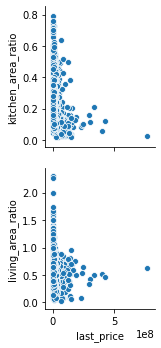

In [88]:
sns.pairplot(data=estate_df,
                  x_vars=['last_price'],
                  y_vars=["kitchen_area_ratio" , "living_area_ratio"])

In [89]:
estate_df[["price_per_square_meter", "kitchen_area_ratio" , "living_area_ratio"]].describe()

,price_per_square_meter,kitchen_area_ratio,living_area_ratio
count,2.369900e+04,23699.000000,23699.000000
mean,9.942166e+04,0.189452,0.567374
std,5.030680e+04,0.075799,0.124044
min,1.118349e+02,0.018200,0.021583
25%,7.658547e+04,0.133656,0.491008
50%,9.500000e+04,0.173913,0.567823
75%,1.142563e+05,0.234615,0.642857
max,1.907500e+06,0.787879,2.307692


<div class="alert alert-block alert-info">
<h2> Comments 2 </h2>
</div>

Good :)

------------

### Step 4. Conduct exploratory data analysis and follow the instructions below:

<ul><li>Carefully investigate the following parameters: square area, price, number of rooms, and ceiling height. Plot a histogram for each parameter.</li><li>Examine the time it's taken to sell the apartment and plot a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered to have happened rather quickly or taken an extra long time?</li><li>Remove rare and outlying values and describe the patterns you've discovered.</li><li>Which factors have had the biggest influence on an apartment’s price? Examine whether the value depends on the total square area, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the publication date: day of the week, month, and year.</li><li>Select the 10 localities with the largest number of ads then calculate the average price per square meter in these localities. Determine which ones have the highest and lowest housing prices. You can find this data by name in the ’<em>locality_name’</em> column.</li><li>Thoroughly look at apartment offers: Each apartment has information about the distance to the city center. Select apartments in Saint Petersburg (<em>‘locality_name’</em>). Your task is to pinpoint which area is considered to be downtown. In order to do that, create a column with the distance to the city center in km and round to the nearest whole number. Next, calculate the average price for each kilometer and plot a graph to display how prices are affected by the distance to the city center. Find a place on the graph where it shifts significantly. That's the downtown border.</li><li>Select all the apartments in the downtown and examine correlations between the following parameters: total area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price: number of rooms, floor, distance to the downtown area, and ad publication date. Draw your conclusions. Are they different from the overall deductions about the entire city?</li></ul>

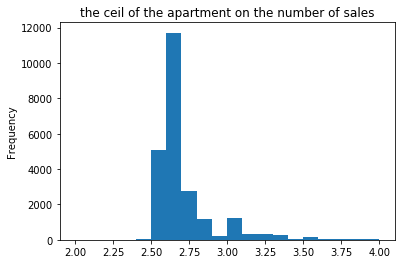

In [90]:
estate_df["ceiling_height"].plot(kind='hist', bins=20,range=(2,4), title="the ceil of the apartment on the number of sales")
plt.show()

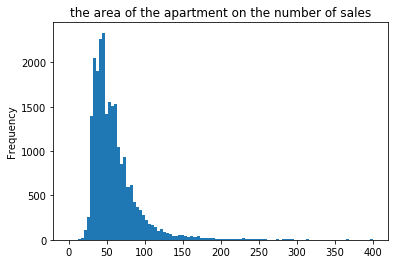

In [91]:
estate_df["total_area"].plot(kind='hist', bins=100,range=(0,400), title="the area of the apartment on the number of sales")
plt.show()

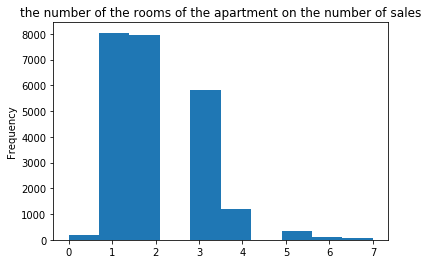

In [92]:
estate_df["rooms"].plot(kind='hist', bins=10,range=(0,7), title="the number of the rooms of the apartment on the number of sales")
plt.show()

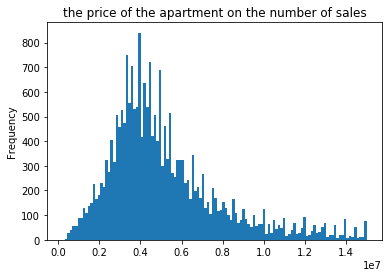

In [93]:
estate_df["last_price"].plot(kind='hist', bins=120,range=(200_000, 15_000_000), title="the price of the apartment on the number of sales")
plt.show()

In [94]:
estate_df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

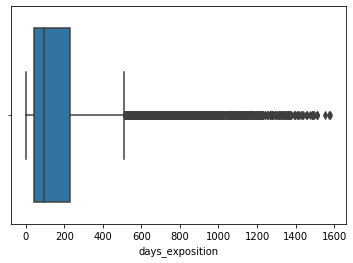

In [95]:
sns.boxplot(data=estate_df, x="days_exposition")

In [96]:
f"mean:{estate_df['days_exposition'].mean()}"
f"median: {estate_df['days_exposition'].median()}"


'mean:180.88863436982163'

'median: 95.0'

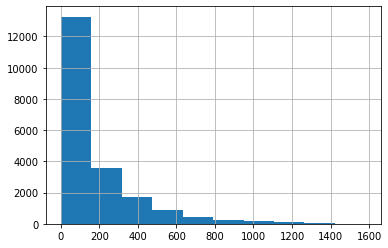

In [97]:
estate_df['days_exposition'].hist()

No handles with labels found to put in legend.


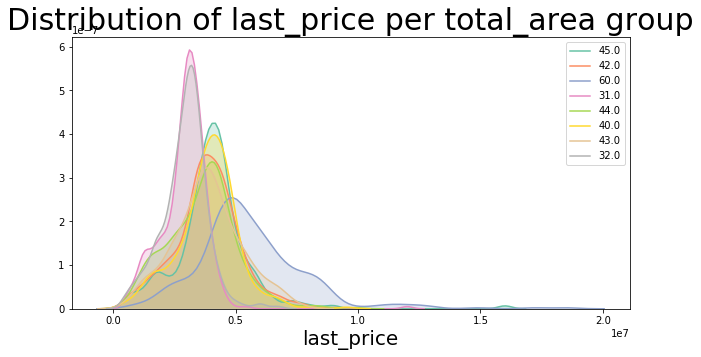

In [98]:
display_group_density_plot(estate_df, groupby = "total_area", on = 'last_price', \
                                           palette = sns.color_palette('Set2'), 
                           figsize = (10, 5))

The total square area, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the publication date: day of the week, month, and year.

No handles with labels found to put in legend.


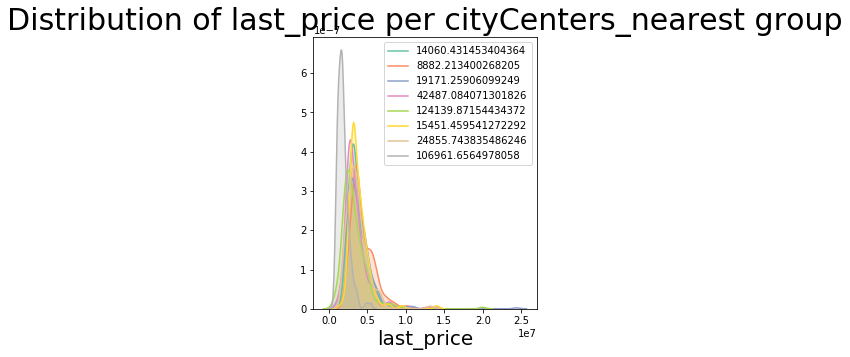

In [100]:
display_group_density_plot(estate_df, groupby = "cityCenters_nearest", on = 'last_price', \
                                           palette = sns.color_palette('Set2'), 
                           figsize = (4, 5))

In [101]:
estate_df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name',
       'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition',
       'llast_price', 'pos', 'dist', 'price_per_square_meter', 'weekday',
       'month', 'year', 'day', 'floor_type', 'first_floor', 'last_floor',
       'other_floor', 'living_area_ratio', 'kitchen_area_ratio'],
      dtype='object')

Conclusion: avg. apartment sale time 95 days.

In [102]:
cols = [
 'living_area_ratio', 'kitchen_area_ratio',    
"total_area",
"rooms",
"ceiling_height",
"floors_total",
"living_area",
"floor",
"kitchen_area",
"balcony",
"airports_nearest",
"cityCenters_nearest",
"parks_around3000",
"parks_nearest",
"ponds_around3000",
"ponds_nearest",
"days_exposition"]
for col in cols:
    estate_df[[col, "last_price"]].corr()

,living_area_ratio,last_price
living_area_ratio,1.000000,-0.068297
last_price,-0.068297,1.000000


,kitchen_area_ratio,last_price
kitchen_area_ratio,1.000000,-0.121529
last_price,-0.121529,1.000000


,total_area,last_price
total_area,1.000000,0.653675
last_price,0.653675,1.000000


,rooms,last_price
rooms,1.000000,0.363343
last_price,0.363343,1.000000


,ceiling_height,last_price
ceiling_height,1.00000,0.07959
last_price,0.07959,1.00000


,floors_total,last_price
floors_total,1.000000,-0.006082
last_price,-0.006082,1.000000


,living_area,last_price
living_area,1.000000,0.542483
last_price,0.542483,1.000000


,floor,last_price
floor,1.000000,0.026576
last_price,0.026576,1.000000


,kitchen_area,last_price
kitchen_area,1.000000,0.440316
last_price,0.440316,1.000000


,balcony,last_price
balcony,1.000000,0.008559
last_price,0.008559,1.000000


,airports_nearest,last_price
airports_nearest,1.00000,0.09036
last_price,0.09036,1.00000


,cityCenters_nearest,last_price
cityCenters_nearest,1.000000,-0.042646
last_price,-0.042646,1.000000


,parks_around3000,last_price
parks_around3000,1.000000,0.151058
last_price,0.151058,1.000000


,parks_nearest,last_price
parks_nearest,1.000000,-0.016414
last_price,-0.016414,1.000000


,ponds_around3000,last_price
ponds_around3000,1.000000,0.159996
last_price,0.159996,1.000000


,ponds_nearest,last_price
ponds_nearest,1.000000,-0.084809
last_price,-0.084809,1.000000


,days_exposition,last_price
days_exposition,1.000000,0.081146
last_price,0.081146,1.000000


As we see there is high correlation between square metric and price

In [103]:
spb_estate_df = estate_df.loc[estate_df['locality_name'] == 'Saint Peterburg'][:]

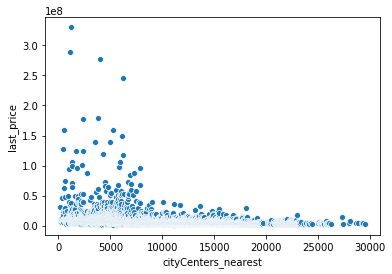

In [104]:
sns.scatterplot(y="last_price", x='cityCenters_nearest', data=spb_estate_df.pivot_table(index='cityCenters_nearest', values='last_price').reset_index())

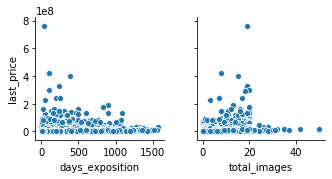

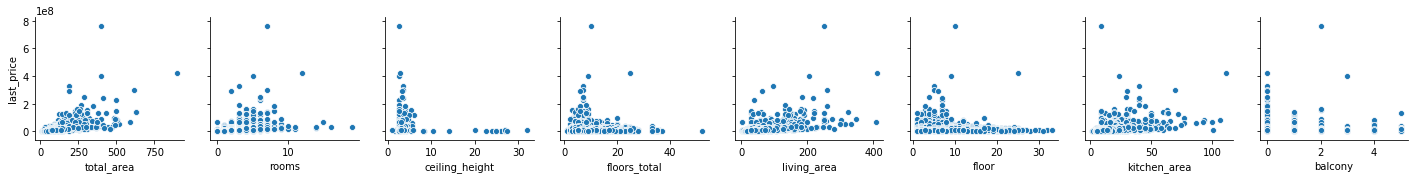

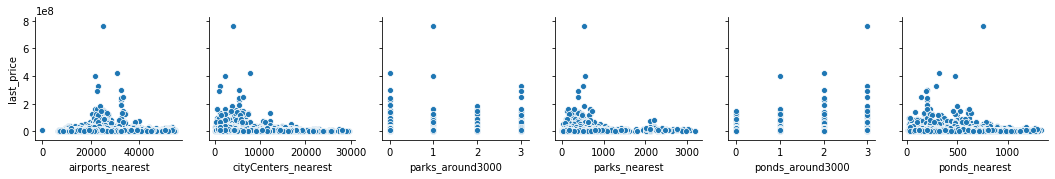

In [106]:
sns.pairplot(data=spb_estate_df,
                  y_vars=['last_price'],
                  x_vars=["days_exposition" , "total_images"])
sns.pairplot(data=spb_estate_df,
                  y_vars=['last_price'],
                  x_vars=["total_area","rooms","ceiling_height","floors_total","living_area","floor","kitchen_area","balcony"])
sns.pairplot(data=spb_estate_df,
                  y_vars=['last_price'],
                  x_vars=["airports_nearest","cityCenters_nearest","parks_around3000","parks_nearest","ponds_around3000","ponds_nearest"])


No handles with labels found to put in legend.


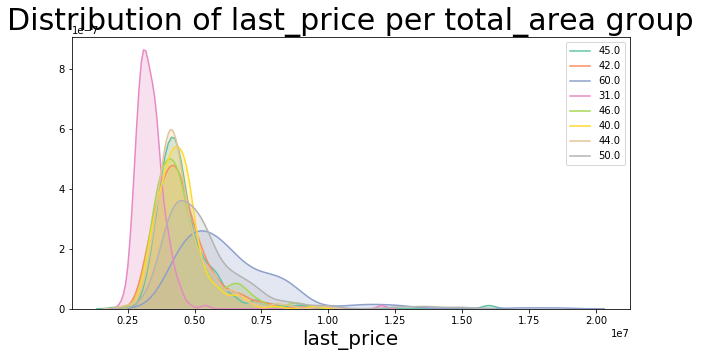

In [105]:
display_group_density_plot(spb_estate_df, groupby = "total_area", on = 'last_price', \
                                           palette = sns.color_palette('Set2'), 
                           figsize = (10, 5))

In [107]:
spb_estate_df.describe().T[["50%","mean"]]

,50%,mean
total_images,1.000000e+01,1.018020e+01
last_price,5.500000e+06,8.062507e+06
total_area,5.500000e+01,6.475149e+01
rooms,2.000000e+00,2.171618e+00
ceiling_height,2.650000e+00,2.742598e+00
floors_total,9.000000e+00,1.149208e+01
living_area,3.020000e+01,3.646734e+01
floor,5.000000e+00,6.242033e+00
kitchen_area,9.100000e+00,1.097548e+01
balcony,0.000000e+00,5.817696e-01


<div class="alert alert-block alert-info">
<h2> Comments 2 </h2>
</div>

Okay :)

You need to give comments to each graph you've plotted, table you've builed or value you've calculated.

------------

### Step 5. Overall conclusion

Overall conclusion. 
Fisrt of all as expected we have some problems with missing data (since we have two different sources of collecting data)
The distance metrics also were missed. I tried filled it. (Idea was using geocoding, but api wasn't responded)
There were found metrics that have impact on our target feature. Built graphs of the dependence of the price of the apartment on its parameters. The parameters that directly affect the cost of the apartment are defined:
Also were created new features. Also we found that the most of the apartments are for the city center, were the number of rooms decreases.



<div class="alert alert-block alert-info">
<h2> Comments 2 </h2>
</div>

Okay :)

What are those features that affect cost of the apartment?

------------

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [ ]  files explored (first rows printed, info() method)
- [ ]  missing values determined
- [ ]  missing values filled in
- [ ]  clarification of the discovered missing values provided
- [ ]  data types converted
- [ ]  explanation of which columns had the data types changed and why
- [ ]  calculated and added to the table: the price per square meter
- [ ]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [ ]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [ ]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [ ]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [ ]  histograms for each parameter created
- [ ]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [ ]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [ ]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year. "Select the 10 places with the largest number of ads and then calculate the average price per square foot in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [ ]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [ ]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [ ]  each stage has a conclusion
- [ ]  overall conclusion drawn